In [18]:
import sys
sys.path.append('..')

from src.analysis import run_simulation, calculate_scaling_exponents
from src.visualization import plot_scaling_results
import numpy as np

In [2]:
N_values = [50, 100, 200, 400, 600, 800, 1000, 1500, 2000, 3000, 5000]
print("Starting simulation...")
print("This may take several minutes for larger N values.")
print("="*60)

results = run_simulation(N_values)

print("\n" + "="*60)
print("Simulation completed!")

Starting simulation...
This may take several minutes for larger N values.
Processing N = 50
Processing N = 100
Processing N = 200
Processing N = 400
Processing N = 600
Processing N = 800
Processing N = 1000
Processing N = 1500
Processing N = 2000
Processing N = 3000
Processing N = 5000

Simulation completed!


In [3]:
exponents = calculate_scaling_exponents(results)

print("="*60)
print("SCALING EXPONENTS")
print("="*60)
for network_type, exp in exponents.items():
    print(f"{network_type:20s}: {exp:.4f}")

SCALING EXPONENTS
1D Lattice          : 0.9982
2D Lattice          : 0.4970
3D Lattice          : 0.3484
Random Network      : 0.1381


Plot saved to results/plots/scaling_behavior.png


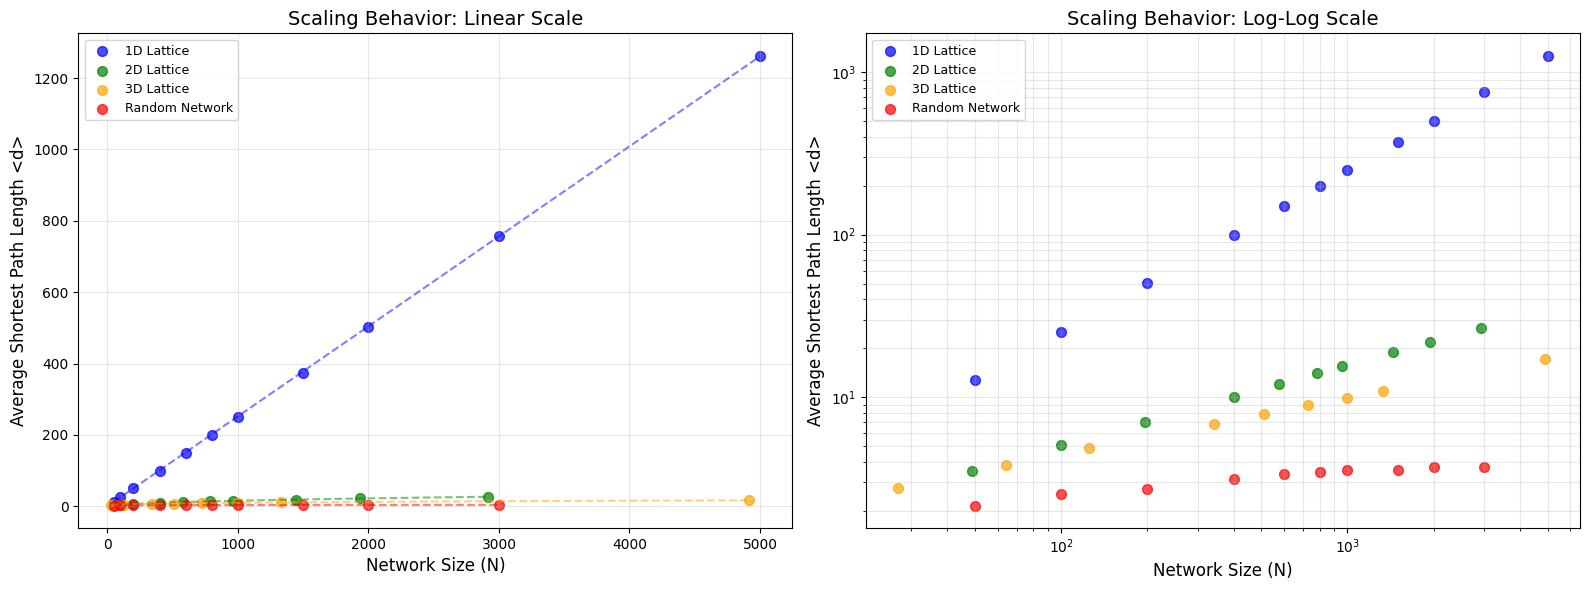

In [4]:
fig = plot_scaling_results(results)

In [6]:
theoretical = {
    '1D Lattice': 1.0,
    '2D Lattice': 0.5,
    '3D Lattice': 0.333,
}

print("\n" + "="*60)
print("COMPARISON WITH THEORETICAL PREDICTIONS")
print("="*60)

for net_type in exponents:
    if net_type in theoretical:
        theo = theoretical[net_type]
        meas = exponents[net_type]
        error = abs(meas - theo) / theo * 100
        
        print(f"\n{net_type}:")
        print(f"  Theoretical: {theo:.3f}")
        print(f"  Measured:    {meas:.3f}")
        print(f"  Error:       {error:.2f}%")
        
        if error < 5:
            status = "EXCELLENT"
        elif error < 10:
            status = "GOOD"
        else:
            status = "FAIR"
        print(f"  Match:       {status}")
    else:
        print(f"\n{net_type}:")
        print(f"  Theoretical: logarithmic scaling")
        print(f"  Measured exponent: {exponents[net_type]:.3f}")
        print(f"  (Small exponent indicates logarithmic behavior)")


COMPARISON WITH THEORETICAL PREDICTIONS

1D Lattice:
  Theoretical: 1.000
  Measured:    0.998
  Error:       0.18%
  Match:       EXCELLENT

2D Lattice:
  Theoretical: 0.500
  Measured:    0.497
  Error:       0.61%
  Match:       EXCELLENT

3D Lattice:
  Theoretical: 0.333
  Measured:    0.348
  Error:       4.62%
  Match:       EXCELLENT

Random Network:
  Theoretical: logarithmic scaling
  Measured exponent: 0.138
  (Small exponent indicates logarithmic behavior)


In [19]:
print("\n" + "="*60)
print("DETAILED RESULTS FOR EACH NETWORK TYPE")
print("="*60)

for network_type, data in results.items():
    if len(data['N']) > 0:
        print(f"\n{network_type}:")
        print(f"{'N':>8s} {'<d>':>10s}")
        print("-" * 20)
        
        for i in range(min(10, len(data['N']))):
            print(f"{data['N'][i]:8d} {data['d'][i]:10.2f}")
        
        if len(data['N']) > 10:
            print(f"... ({len(data['N'])} total data points)")


DETAILED RESULTS FOR EACH NETWORK TYPE

1D Lattice:
       N        <d>
--------------------
      50      12.76
     100      25.25
     200      50.25
     400     100.25
     600     150.25
     800     200.25
    1000     250.25
    1500     374.53
    2000     501.86
    3000     758.67
... (11 total data points)

2D Lattice:
       N        <d>
--------------------
      49       3.50
     100       5.05
     196       7.04
     400      10.03
     576      12.02
     784      14.02
     961      15.50
    1444      19.04
    1936      21.98
    2916      26.59

3D Lattice:
       N        <d>
--------------------
      27       2.77
      64       3.81
     125       4.84
     343       6.88
     512       7.89
     729       8.90
    1000       9.91
    1331      10.87
    4913      17.08

Random Network:
       N        <d>
--------------------
      50       2.15
     100       2.52
     200       2.70
     400       3.13
     600       3.35
     800       3.44
    1000     

In [20]:
print("\n" + "="*60)
print("SMALL-WORLD PROPERTY ANALYSIS")
print("="*60)

print("\nRandom Network exhibits Small-World Property:")

for N_val in [100, 1000, 5000]:
    idx_1d = None
    idx_rn = None
    
    for i, n in enumerate(results['1D Lattice']['N']):
        if n == N_val:
            idx_1d = i
            break
    
    for i, n in enumerate(results['Random Network']['N']):
        if n == N_val:
            idx_rn = i
            break
    
    if idx_1d is not None and idx_rn is not None:
        d_1d = results['1D Lattice']['d'][idx_1d]
        d_rn = results['Random Network']['d'][idx_rn]
        ratio = d_1d / d_rn
        
        print(f"\nN = {N_val}:")
        print(f"  1D Lattice:     <d> = {d_1d:7.2f}")
        print(f"  Random Network: <d> = {d_rn:7.2f}")
        print(f"  Efficiency ratio: {ratio:.1f}x")

print("\nKey Finding:")
print("Random networks are dramatically more efficient than lattices!")
print("This is the 'six degrees of separation' phenomenon.")


SMALL-WORLD PROPERTY ANALYSIS

Random Network exhibits Small-World Property:

N = 100:
  1D Lattice:     <d> =   25.25
  Random Network: <d> =    2.52
  Efficiency ratio: 10.0x

N = 1000:
  1D Lattice:     <d> =  250.25
  Random Network: <d> =    3.54
  Efficiency ratio: 70.6x

Key Finding:
Random networks are dramatically more efficient than lattices!
This is the 'six degrees of separation' phenomenon.


In [21]:
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

for network_type, data in results.items():
    if len(data['N']) > 0:
        N_arr = np.array(data['N'])
        d_arr = np.array(data['d'])
        
        print(f"\n{network_type}:")
        print(f"  Number of data points: {len(N_arr)}")
        print(f"  N range: {N_arr.min()} - {N_arr.max()}")
        print(f"  <d> range: {d_arr.min():.2f} - {d_arr.max():.2f}")
        print(f"  Average <d>: {d_arr.mean():.2f}")


SUMMARY STATISTICS

1D Lattice:
  Number of data points: 11
  N range: 50 - 5000
  <d> range: 12.76 - 1262.19
  Average <d>: 335.14

2D Lattice:
  Number of data points: 10
  N range: 49 - 2916
  <d> range: 3.50 - 26.59
  Average <d>: 13.47

3D Lattice:
  Number of data points: 9
  N range: 27 - 4913
  <d> range: 2.77 - 17.08
  Average <d>: 8.10

Random Network:
  Number of data points: 10
  N range: 50 - 3000
  <d> range: 2.15 - 3.73
  Average <d>: 3.18
